# Cover Photo

In [1]:
# importing libraries
import os
import glob
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import urllib.request
import requests
import matplotlib.patches as mpatches

plt.rcParams['savefig.facecolor'] = 'white'
%matplotlib inline

In [2]:
print('printing packages and versions:\n')

%reload_ext watermark
%watermark -v -p numpy,pandas,geopandas,matplotlib,seaborn

printing packages and versions:

Python implementation: CPython
Python version       : 3.8.13
IPython version      : 8.4.0

numpy     : 1.23.1
pandas    : 1.4.3
geopandas : 0.11.1
matplotlib: 3.5.2
seaborn   : 0.11.2



In [3]:
# importing borough boundaries
path = 'https://data.cityofnewyork.us/api/geospatial/tqmj-j8zm?method=export&format=Shapefile'
borough_gdf = gpd.read_file(path)
borough_gdf = borough_gdf.to_crs(2263)

# preview data
print('shape of data: {}'.format(borough_gdf.shape))
borough_gdf.head()

shape of data: (5, 5)


,boro_code,boro_name,shape_area,shape_leng,geometry
0,5.0,Staten Island,1.623621e+09,325917.353950,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,1.0,Manhattan,6.365205e+08,357713.308162,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
2,2.0,Bronx,1.187175e+09,463180.579449,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."
3,3.0,Brooklyn,1.934138e+09,728146.574928,"MULTIPOLYGON (((1022227.320 152028.146, 102207..."
4,4.0,Queens,3.041419e+09,888199.731385,"MULTIPOLYGON (((1032452.015 154469.237, 103245..."


<AxesSubplot:>

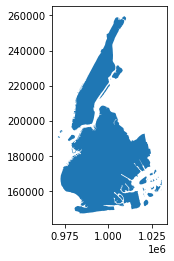

In [4]:
borough_gdf = (
    borough_gdf
    .loc[borough_gdf['boro_name'].isin(['Manhattan', 'Brooklyn'])]
    .reset_index(drop=True)
)

borough_gdf.plot()

# Sea Level Rise Maps (2050s 500-year Floodplain)

In [5]:
# reading in shape file
url = 'https://data.cityofnewyork.us/api/geospatial/qwca-zqw3?method=export&format=Shapefile'
gdf = gpd.read_file(url)
gdf = gdf.to_crs(2263)

# examine data
print('shape of data: {}'.format(gdf.shape))
gdf.head()

shape of data: (7055, 8)


,abfe_0_2pc,fld_zone,gridcode,join_count,shape_area,shape_leng,static_bfe,geometry
0,0.0,None,1500.0,0.0,0.0,0.0,0.0,"POLYGON ((1009144.300 272710.675, 1009098.200 ..."
1,0.0,None,1300.0,0.0,0.0,0.0,0.0,"POLYGON ((1015144.300 267035.675, 1015208.411 ..."
2,0.0,None,1300.0,0.0,0.0,0.0,0.0,"POLYGON ((1015069.300 266835.675, 1015084.510 ..."
3,0.0,None,1300.0,0.0,0.0,0.0,0.0,"POLYGON ((1015044.300 266735.675, 1015044.300 ..."
4,0.0,None,1300.0,0.0,0.0,0.0,0.0,"POLYGON ((1015044.300 266685.675, 1015009.425 ..."


In [6]:
gdf.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

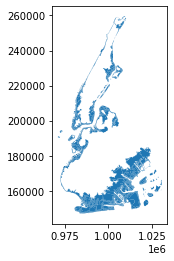

In [7]:
# clip flood polygon against borough geometry
clipped_gdf = gpd.clip(gdf, borough_gdf)

clipped_gdf.plot()

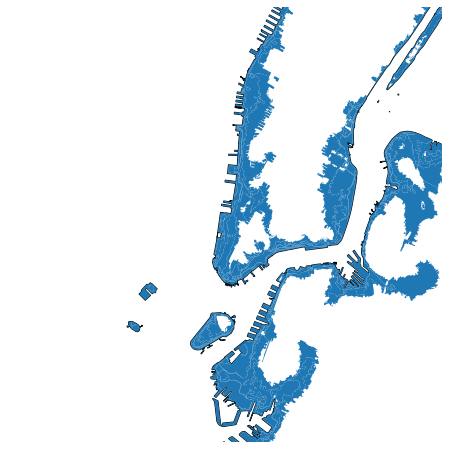

In [8]:
fig, ax = plt.subplots(figsize=(8, 8))

clipped_gdf.plot(ax=ax)

borough_gdf.plot(
    ax=ax,
    facecolor='None',
    zorder=0,
    linewidth=1
)

plt.ylim(180000, 220000)
plt.xlim(960000, 1000000)
plt.axis('off')
plt.savefig('figures/cover-photo.png', bbox_inches='tight', dpi=250)